In [1]:
# work done by Noah Cyr

In [2]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the raw interactions dataset
df_raw_i = pd.read_csv('RAW_interactions.csv')

In [4]:
# display datset
df_raw_i

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [5]:
# check data types
print(df_raw_i.dtypes)

user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object


In [6]:
# check for null values
null_counts = df_raw_i.isnull().sum()

print(null_counts)

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [7]:
# removing rows with a no value in review column
df_raw_i.dropna(subset=['review'], inplace=True)

In [8]:
# verify nulls were removed
null_counts = df_raw_i.isnull().sum()

print(null_counts)

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64


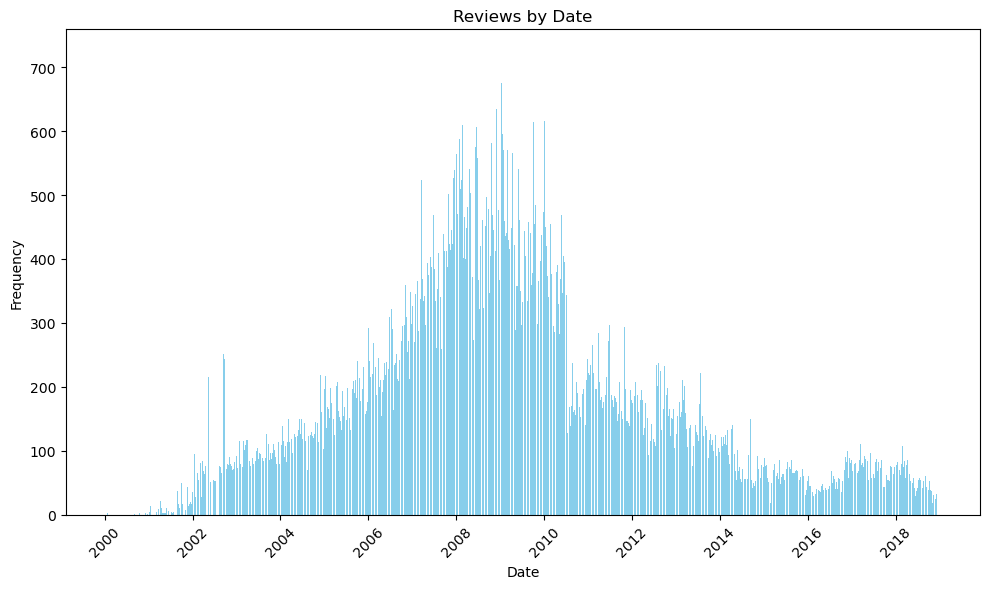

In [9]:
# more imports for graphing
from datetime import datetime
from PIL import Image

df_raw_i['date'] = pd.to_datetime(df_raw_i['date']) #convert date column into datetime data type
frequencies_date = df_raw_i['date'].value_counts().sort_index() #get frequency of reviews by date

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(frequencies_date.index, frequencies_date.values, color='skyblue')

# Rotate date labels for better visibility
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Reviews by Date')

# Display the plot
plt.tight_layout()
plt.show()

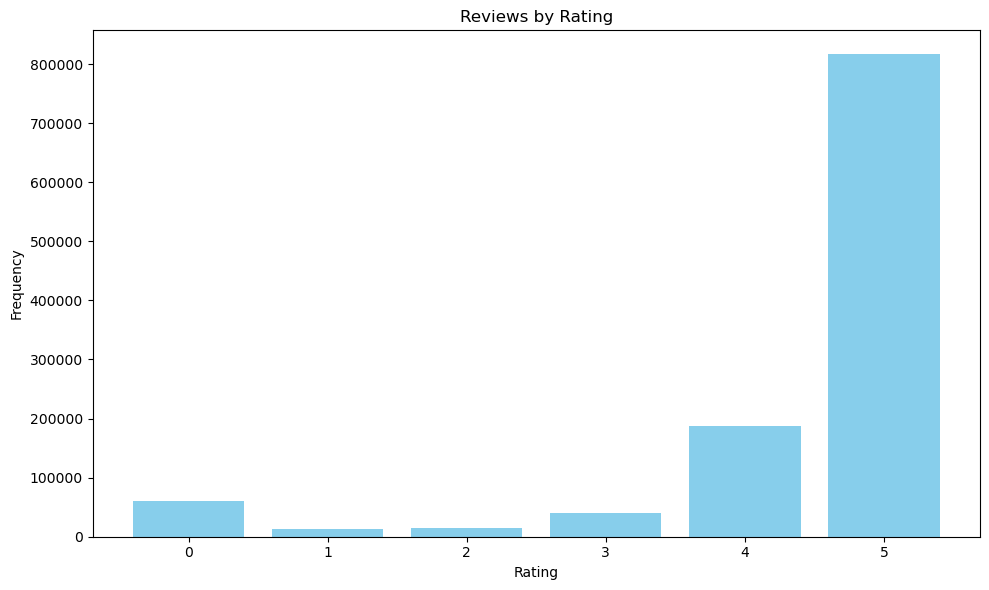

In [10]:
frequencies_rating = df_raw_i['rating'].value_counts().sort_index() #get frequency of reviews in each rating

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(frequencies_rating.index, frequencies_rating.values, color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Reviews by Rating')

# Display the plot
plt.tight_layout()
plt.show()

In [11]:
# find the total number of reviews
print(len(df_raw_i))

1132198


In [12]:
num_entries = len(df_raw_i) #declare the total number of reviews as the number of entries

# create dataframes of the recipes by each rating given
df_0star = df_raw_i.loc[df_raw_i['rating'] == 0]
df_1star = df_raw_i.loc[df_raw_i['rating'] == 1]
df_2star = df_raw_i.loc[df_raw_i['rating'] == 2]
df_3star = df_raw_i.loc[df_raw_i['rating'] == 3]
df_4star = df_raw_i.loc[df_raw_i['rating'] == 4]
df_5star = df_raw_i.loc[df_raw_i['rating'] == 5]

# calculate the percentages for each rating 
p_zero_star_cnt = len(df_0star)/num_entries
p_one_star_cnt = len(df_1star)/num_entries
p_two_star_cnt = len(df_2star)/num_entries
p_three_star_cnt = len(df_3star)/num_entries
p_four_star_cnt = len(df_4star)/num_entries
p_five_star_cnt = len(df_5star)/num_entries

# print percentages
print("Percentage 0 Stars:", f"{p_zero_star_cnt:.2%}")
print("Percentage 1 Stars:", f"{p_one_star_cnt:.2%}")
print("Percentage 2 Stars:", f"{p_two_star_cnt:.2%}")
print("Percentage 3 Stars:", f"{p_three_star_cnt:.2%}")
print("Percentage 4 Stars:", f"{p_four_star_cnt:.2%}")
print("Percentage 5 Stars:", f"{p_five_star_cnt:.2%}")

Percentage 0 Stars: 5.37%
Percentage 1 Stars: 1.13%
Percentage 2 Stars: 1.25%
Percentage 3 Stars: 3.61%
Percentage 4 Stars: 16.55%
Percentage 5 Stars: 72.09%


In [13]:
# SENTIMENT ANALYSIS
from textblob import TextBlob #import TextBlob

# list to store sentiment scores to find average of each rating
s_scores_zero = []
s_scores_one = []
s_scores_two = []
s_scores_three = []
s_scores_four = []
s_scores_five = []

  
#sentiment = "Positive" if sentiment_score > 0, else if "Negative" if sentiment_score < 0, else "Neutral"

In [14]:
# loop over 0 star reviews, perform sentiment analysis, and store the sentiment score
for review in df_0star['review']:
    analysis = TextBlob(review) # Perform sentiment analysis
    sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
    s_scores_zero.append(sentiment_score) # store sentiment score

In [15]:
bad_review = "" #worst review variable
current_sentiment_2 = 1 #worst review sentiment variable

# loop over 1 star reviews, perform sentiment analysis, and store the sentiment score
# also find a 1 star review with the worst sentiment score
for review in df_1star['review']:
    analysis = TextBlob(review) # Perform sentiment analysis
    sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
    s_scores_one.append(sentiment_score) # store sentiment score
    if (sentiment_score < current_sentiment_2): #if this sentiment score is worse than the current worse sentiment
        current_sentiment_2 = sentiment_score #replace the current sentiment with this new one
        bad_review = review #replace the current worse review with this new review

print(bad_review)
print(current_sentiment_2)

Worst pie baked in the continental United States since I can recall. Tasked like skilly-winks, if you've had the disgrace of having known the flavor.
-1.0


In [16]:
# loop over 2 star reviews, perform sentiment analysis, and store the sentiment score
for review in df_2star['review']:
    analysis = TextBlob(review) # Perform sentiment analysis
    sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
    s_scores_two.append(sentiment_score) # store sentiment score

In [17]:
# loop over 3 star reviews, perform sentiment analysis, and store the sentiment score
for review in df_3star['review']:
    analysis = TextBlob(review) # Perform sentiment analysis
    sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
    s_scores_three.append(sentiment_score) # store sentiment score

In [18]:
# loop over 4 star reviews, perform sentiment analysis, and store the sentiment score
for review in df_4star['review']:
    analysis = TextBlob(review) # Perform sentiment analysis
    sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
    s_scores_four.append(sentiment_score) # store sentiment score

In [19]:
# loop over 5 star reviews, perform sentiment analysis, and store the sentiment score
for review in df_5star['review']:
    analysis = TextBlob(review) # Perform sentiment analysis
    sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
    s_scores_five.append(sentiment_score) # store sentiment score

In [20]:
# Finding the average sentiment of review of each rating 
zero_avg = sum(s_scores_zero)/len(s_scores_zero) #0 stars
one_avg = sum(s_scores_one)/len(s_scores_one) #1 stars
two_avg = sum(s_scores_two)/len(s_scores_two) #2 stars
three_avg = sum(s_scores_three)/len(s_scores_three) #3 stars
four_avg = sum(s_scores_four)/len(s_scores_four) #4 stars
five_avg = sum(s_scores_five)/len(s_scores_five) #5 stars

# Pint the average scores of each rating (formatted)
print("Average Sentiment of 0 Star Reviews:", f"{zero_avg:.4f}")
print("Average Sentiment of 1 Star Reviews:", f"{one_avg:.4f}")
print("Average Sentiment of 2 Star Reviews:", f"{two_avg:.4f}")
print("Average Sentiment of 3 Star Reviews:", f"{three_avg:.4f}")
print("Average Sentiment of 4 Star Reviews:", f"{four_avg:.4f}")
print("Average Sentiment of 5 Star Reviews:", f"{five_avg:.4f}")

Average Sentiment of 0 Star Reviews: 0.2622
Average Sentiment of 1 Star Reviews: -0.0190
Average Sentiment of 2 Star Reviews: 0.0998
Average Sentiment of 3 Star Reviews: 0.1965
Average Sentiment of 4 Star Reviews: 0.2919
Average Sentiment of 5 Star Reviews: 0.3640


In [21]:
# sentiment analysis for second review in slideshow
# review
text1 = "Excellent and easy! The flavors blended together nicely with a nice Asian-American flare - even my children gobbled this up, veggies and all! I served with springrolls (frozen). Enjoy!"

analysis = TextBlob(text1) #perform sentiment analysis
sentiment_score = analysis.sentiment.polarity # Range: [-1.0, 1.0]
print(sentiment_score)

0.6783333333333333
